# import packages

In [9]:
import pickle
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import LearningRateScheduler
import numpy as np
import pandas as pd

# load dataset

In [10]:
with open("data8.pickle", 'rb') as f:
        data = pickle.load(f, encoding='latin1')

# Discover the Dataset

In [11]:
data

{'y_validation': array([ 9, 37, 31, ...,  5, 18,  6], dtype=uint8),
 'x_train': array([[[[-0.54642206,  1.0425833 ,  0.79494214, ..., -0.70286393,
           -0.67279685, -0.602346  ],
          [-0.6146229 ,  0.74160224,  0.5867728 , ...,  0.16095497,
            0.15466528,  0.0214771 ],
          [-0.69638306,  0.5387884 ,  0.44214383, ..., -0.06861585,
           -0.24066828, -0.35183737],
          ...,
          [ 0.12834986,  0.41358492,  0.5119226 , ...,  0.3618001 ,
            0.545381  , -0.48002478],
          [ 0.4186098 ,  0.38220668,  0.47971445, ...,  0.55423665,
            0.73357224, -0.4668069 ],
          [-0.54892397, -0.61771524, -0.6314567 , ...,  0.68108726,
            0.85835606, -0.4669531 ]]],
 
 
        [[[-0.54642206, -0.56189924, -0.6495985 , ..., -0.12373468,
            0.02414251, -0.54330283],
          [-0.03432735,  0.15697211,  0.10856288, ..., -0.5076013 ,
           -0.14035697, -0.6238451 ],
          [-0.17071831, -0.12555376, -0.0688336 , ..

In [12]:

print('number of columns per data :',len(data))

number of columns per data : 7


In [13]:
counter=0
labelarr=[]
for labels in data['labels']:
    labelarr.append([labels])
    counter+=1
print('number of labels available in dataset :',counter)
xtraincounter=0
for labels in data['x_train']:
    xtraincounter+=1
print('number of images available for training :',xtraincounter)
ytraincounter=0
for labels in data['y_train']:
    ytraincounter+=1
print('number of labels available for training :',ytraincounter)
xtestcounter=0
for labels in data['x_test']:
    xtestcounter+=1
print('number of images available for test :',xtestcounter)
ytestcounter=0
for labels in data['y_test']:
    ytestcounter+=1
print('number of lables available for test :',ytestcounter)
yvcounter=0
for labels in data['y_validation']:
    yvcounter+=1
print('number of lables available for validation :',yvcounter)
xvcounter=0
for labels in data['x_validation']:
    xvcounter+=1
print('number of images available for validation :',xvcounter)

print('total number of images per dataset  :',xtraincounter+xtestcounter+xvcounter)


number of labels available in dataset : 43
number of images available for training : 86989
number of labels available for training : 86989
number of images available for test : 12630
number of lables available for test : 12630
number of lables available for validation : 4410
number of images available for validation : 4410
total number of images per dataset  : 104029


In [14]:
y_train = data['y_train']
y_test = data['y_test']
y_validation = data['y_validation']
data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)


# visualization about dataset

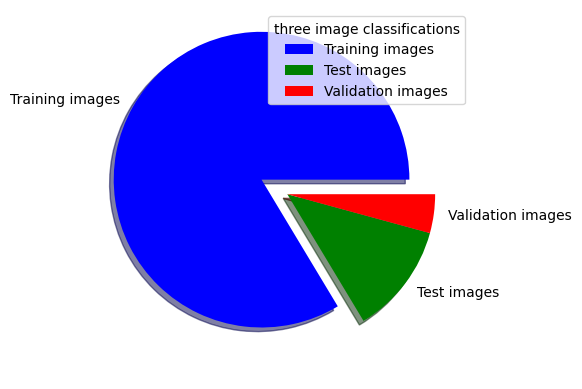

In [15]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([xtraincounter, xtestcounter, xvcounter])
mylabels = ["Training images", "Test images", "Validation images"]
myexplode = [0.2, 0, 0]
mycolors = ["blue", "green", "red"]
plt.pie(y, labels = mylabels,explode = myexplode,shadow = True,colors = mycolors)
plt.legend(title = "three image classifications")

plt.show() 

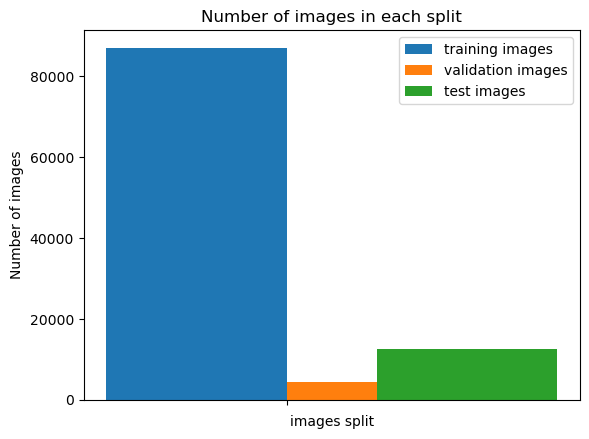

In [16]:
categories = ['']
X = [xtraincounter]
Y = [xvcounter]
z=  [xtestcounter]
  
X_axis = np.arange(len(categories))
  
plt.bar(X_axis - 0.2, X, 0.4, label = 'training images')
plt.bar(X_axis + 0.2, Y, 0.4, label = 'validation images')
plt.bar(X_axis + 0.4, z, 0.4, label = 'test images')  
plt.xticks(X_axis, categories)
plt.xlabel("images split")
plt.ylabel("Number of images")
plt.title("Number of images in each split")
plt.legend()
plt.show()

In [17]:
print('biggest class number :',data['y_test'].max())

biggest class number : 42


In [18]:
print('smallest class number :',data['y_test'].min())

smallest class number : 0


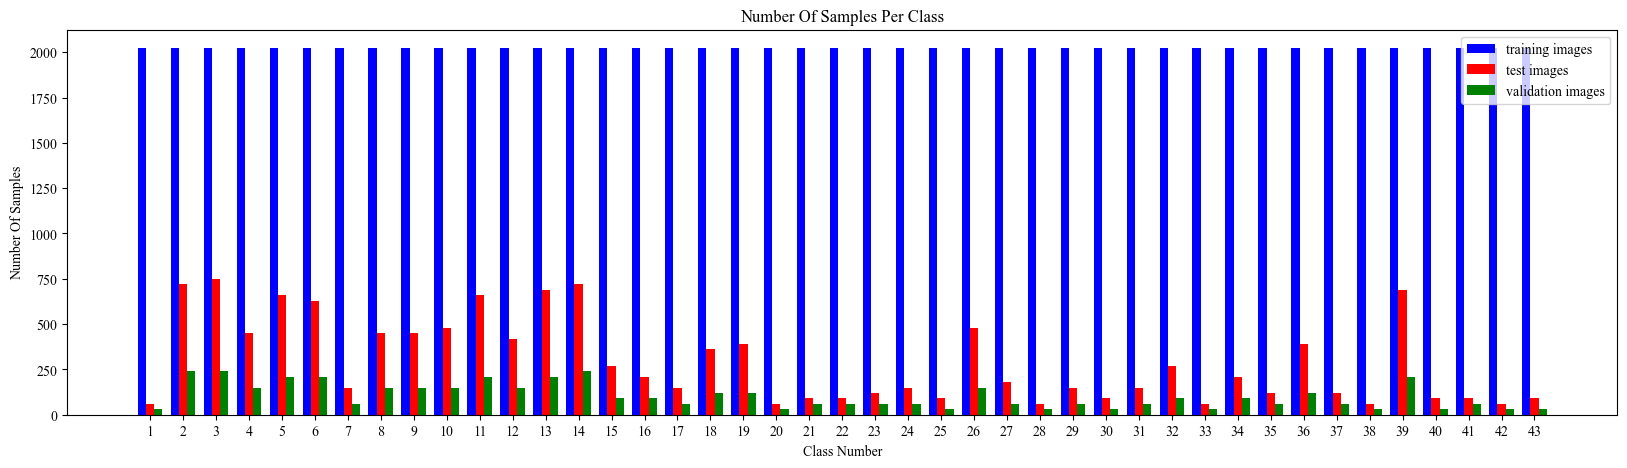

In [19]:
## YAHIA TAREK SHUGHLK HYBD2 MN HNA Y HNDSAAA
## YAHIA TAREK SHUGHLK HYBD2 MN HNA Y HNDSAAA
test_num = []
train_num = []
validation_num = []

for i in range(0, 43):
    train_num.append(np.count_nonzero(y_train== i))
    test_num.append(np.count_nonzero(y_test== i))
    validation_num.append(np.count_nonzero(y_validation== i))

x = range(1, 44)
X_axis = np.arange(len(x))
bar_width = 0.25

plt.rcParams['figure.figsize'] = (20.0, 5.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

plt.bar(X_axis, train_num, bar_width, color = "b", label = 'training images')
plt.bar(X_axis + bar_width, test_num, bar_width, color = "r", label = 'test images')
plt.bar(X_axis + bar_width*2, validation_num, bar_width, color = "g", label = 'validation images')
plt.xticks(X_axis+bar_width, x)
plt.ylabel("Number Of Samples")
plt.xlabel("Class Number")
plt.title("Number Of Samples Per Class")
plt.legend()
plt.show()



# implement model

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.4))
model.add(Dense(43, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 10

h = model.fit(data['x_train'], data['y_train'],
              batch_size=128, epochs = epochs,
              validation_data = (data['x_validation'], data['y_validation']),
              callbacks=[annealer], verbose=1)

print('Epochs={0:d}, training accuracy={1:.5f}, validation accuracy={2:.5f}'.\
      format(epochs, max(h.history['accuracy']), max(h.history['val_accuracy'])))

# visualization of model performance

In [32]:
plt.rcParams['figure.figsize'] = (15.0, 5.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure()
plt.plot(h.history['accuracy'], '-o', linewidth=3.0)
plt.plot(h.history['val_accuracy'], '-o', linewidth=3.0)
plt.title('data8: Data Accuracy Over Epochs', fontsize=22)
plt.legend(['train', 'validation'], loc='upper left', fontsize='xx-large')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.tick_params(labelsize=18)


# Showing the plot
plt.show()

# Saving the plot
fig.savefig('data8_saccuracy.png')
plt.close()

plt.rcParams['figure.figsize'] = (15.0, 5.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure()
plt.plot(h.history['loss'], '-o', linewidth=3.0)
plt.plot(h.history['val_loss'], '-o', linewidth=3.0)
plt.title('data8: loss Over Epochs', fontsize=22)
plt.legend(['train', 'validation'], loc='upper left', fontsize='xx-large')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.tick_params(labelsize=18)

plt.show()
fig.savefig('data8_loss.png')
plt.close()

AttributeError: 'list' object has no attribute 'history'

<Figure size 1500x500 with 0 Axes>

# evaluate model acuuracy to reach 97%

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.4))
model.add(Dense(43, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 20

h = model.fit(data['x_train'], data['y_train'],
              batch_size=128, epochs = epochs,
              validation_data = (data['x_validation'], data['y_validation']),
              callbacks=[annealer], verbose=1)

print('Epochs={0:d}, training accuracy={1:.5f}, validation accuracy={2:.5f}'.\
      format(epochs, max(h.history['accuracy']), max(h.history['val_accuracy'])))

Epoch 1/20
680/680 [==============================] - 19s 27ms/step - loss: 1.5222 - accuracy: 0.5763 - val_loss: 0.3587 - val_accuracy: 0.9143 - lr: 3.5849e-04
Epoch 2/20
680/680 [==============================] - 17s 25ms/step - loss: 0.4554 - accuracy: 0.8685 - val_loss: 0.2208 - val_accuracy: 0.9401 - lr: 3.4056e-04
Epoch 3/20
680/680 [==============================] - 17s 25ms/step - loss: 0.2919 - accuracy: 0.9156 - val_loss: 0.1875 - val_accuracy: 0.9463 - lr: 3.2353e-04
Epoch 4/20
680/680 [==============================] - 17s 25ms/step - loss: 0.2209 - accuracy: 0.9354 - val_loss: 0.1658 - val_accuracy: 0.9510 - lr: 3.0736e-04
Epoch 5/20
680/680 [==============================] - 18s 27ms/step - loss: 0.1791 - accuracy: 0.9470 - val_loss: 0.1540 - val_accuracy: 0.9587 - lr: 2.9199e-04
Epoch 6/20
680/680 [==============================] - 17s 26ms/step - loss: 0.1521 - accuracy: 0.9551 - val_loss: 0.1487 - val_accuracy: 0.9594 - lr: 2.7739e-04
Epoch 7/20
680/680 [==============

In [16]:
model.save('traffic-signs-97%.model')

INFO:tensorflow:Assets written to: traffic-signs-97%.model\assets


INFO:tensorflow:Assets written to: traffic-signs-97%.model\assets


# testing model

x-input (1, 32, 32, 1)
y-input [7]


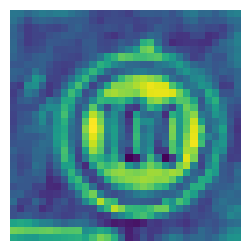

In [28]:
import pickle
from keras.models import load_model
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

model = load_model('traffic-signs-97%.model')

with open("data8.pickle", 'rb') as f:
        data = pickle.load(f, encoding='latin1')
        
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

def label_text(file):
    label_list = []
    
    r = pd.read_csv(file)
    for name in r['SignName']:
        label_list.append(name)
    
    return label_list


labels = label_text('label_names.csv')


x_input = data['x_test'][12:13]
print('x-input',x_input.shape)
y_input = data['y_test'][12:13]
print('y-input',y_input)

plt.rcParams['figure.figsize'] = (3, 3) 
# plt.imshow(x_input[0, :, :, :])
plt.imshow((x_input[0, :, :, :] ))
plt.axis('off')

plt.show()




In [29]:
scores = model.predict(x_input)

prediction = np.argmax(scores)

print('ClassId:', prediction)

print('Label:', labels[prediction])

data['y_test'] = to_categorical(data['y_test'], num_classes=43)
h = model.evaluate(data["x_test"], data["y_test"])

1/1 [==============================] - 0s 69ms/step
ClassId: 7
Label: Speed limit (100km/h)
395/395 [==============================] - 2s 4ms/step - loss: 0.2164 - accuracy: 0.9502
